<a href="https://colab.research.google.com/github/Mz72100/Machine-learning-toturial/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraudulent Transaction Detection in Financial Systems.**

# **Part 1: Loading Library Files and Dataset**

In [1]:
import pandas as pd
import numpy as np

# Load the training data
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

# Load the test data
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

print(f"Train Transaction shape: {train_transaction.shape}")
print(f"Train Identity shape: {train_identity.shape}")

Train Transaction shape: (458923, 394)
Train Identity shape: (144233, 41)


## **Merging Dataset**

In [2]:
# Merge Train data
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

# Merge Test data
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

print(f"Final Train shape: {train.shape}")
print(f"Final Test shape: {test.shape}")

Final Train shape: (458923, 434)
Final Test shape: (492704, 433)


In [3]:
# Check target distribution
fraud_pct = train['isFraud'].value_counts(normalize=True) * 100
print(f"Target distribution:\n{fraud_pct}")

# Preview the first few rows
train.head()

Target distribution:
isFraud
0    96.474354
1     3.525646
Name: proportion, dtype: float64


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


# **Part 2: Exploratory Data Analysis**

## **Exploring Basic Dataset**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458923 entries, 0 to 458922
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.5+ GB


In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


## **Checking Duplicate Rows**

In [6]:
# Check for exact duplicate rows across the entire merged dataframe
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check specifically for duplicate TransactionIDs (should be 0)
id_duplicates = train['TransactionID'].duplicated().sum()
print(f"Number of duplicate TransactionIDs: {id_duplicates}")

Number of duplicate rows: 0
Number of duplicate TransactionIDs: 0


## **Checking Missing Values**

In [7]:
# Calculate missing values
null_counts = train.isnull().sum()
null_percent = (null_counts / len(train)) * 100

# Create a summary table
missing_data = pd.DataFrame({
    'Total Missing': null_counts,
    'Percentage (%)': null_percent
}).sort_values(by='Percentage (%)', ascending=False)

# Filter for columns that actually have missing values
missing_data_filtered = missing_data[missing_data['Total Missing'] > 0]

print(f"Total columns with missing values: {len(missing_data_filtered)}")
print("\nTop 20 columns with highest missing percentage:")
print(missing_data_filtered.head(20))

Total columns with missing values: 420

Top 20 columns with highest missing percentage:
       Total Missing  Percentage (%)
id_24         455099       99.166745
id_25         454770       99.095055
id_07         454756       99.092005
id_08         454756       99.092005
id_21         454756       99.092005
id_26         454752       99.091133
id_27         454746       99.089826
id_23         454746       99.089826
id_22         454746       99.089826
D7            429782       93.650133
dist2         427456       93.143294
id_18         422382       92.037662
D13           411210       89.603267
D14           410275       89.399529
D12           407569       88.809887
id_04         406008       88.469743
id_03         406008       88.469743
D6            401931       87.581359
D8            398606       86.856837
id_09         398606       86.856837


## **Visualizing the distribution of missing values**

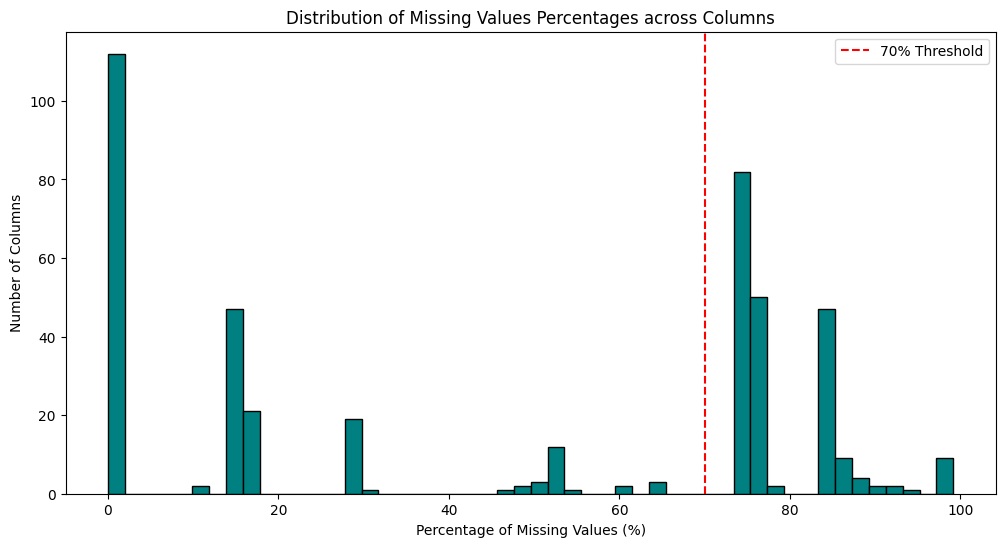

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of missing values across all columns
plt.figure(figsize=(12, 6))
plt.hist(null_percent, bins=50, color='teal', edgecolor='black')
plt.axvline(x=70, color='red', linestyle='--', label='70% Threshold')
plt.title('Distribution of Missing Values Percentages across Columns')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Number of Columns')
plt.legend()
plt.show()

## **Handling Missing Values**

In [9]:
# Identify columns to drop from the missing_data analysis done on Train
threshold = 80
cols_to_drop = missing_data[missing_data['Percentage (%)'] > threshold].index.tolist()

print(f"Attempting to drop {len(cols_to_drop)} columns...")

# Use errors='ignore' so if a column isn't in 'test', it just skips it
train_reduced = train.drop(columns=cols_to_drop, errors='ignore')
test_reduced = test.drop(columns=cols_to_drop, errors='ignore')

print(f"Final Train shape: {train_reduced.shape}")
print(f"Final Test shape: {test_reduced.shape}")

Attempting to drop 74 columns...
Final Train shape: (458923, 360)
Final Test shape: (492704, 378)


## **Target Variable distribution**

/tmp/ipython-input-3106636243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=train, palette='viridis')


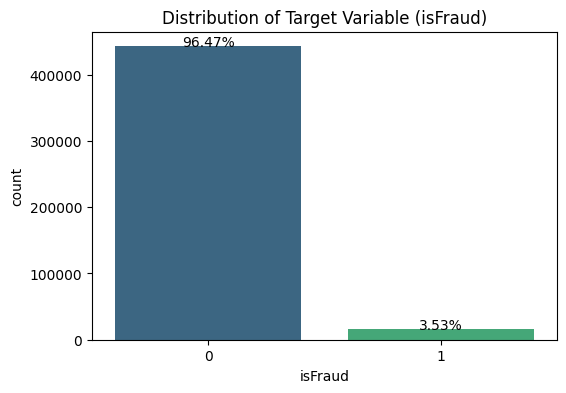

In [10]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='isFraud', data=train, palette='viridis')
plt.title('Distribution of Target Variable (isFraud)')

# Adding percentages on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.2f}%'.format(height/len(train)*100), ha="center")
plt.show()

## **Distribution of Transaction Amount and by Fraud Status**

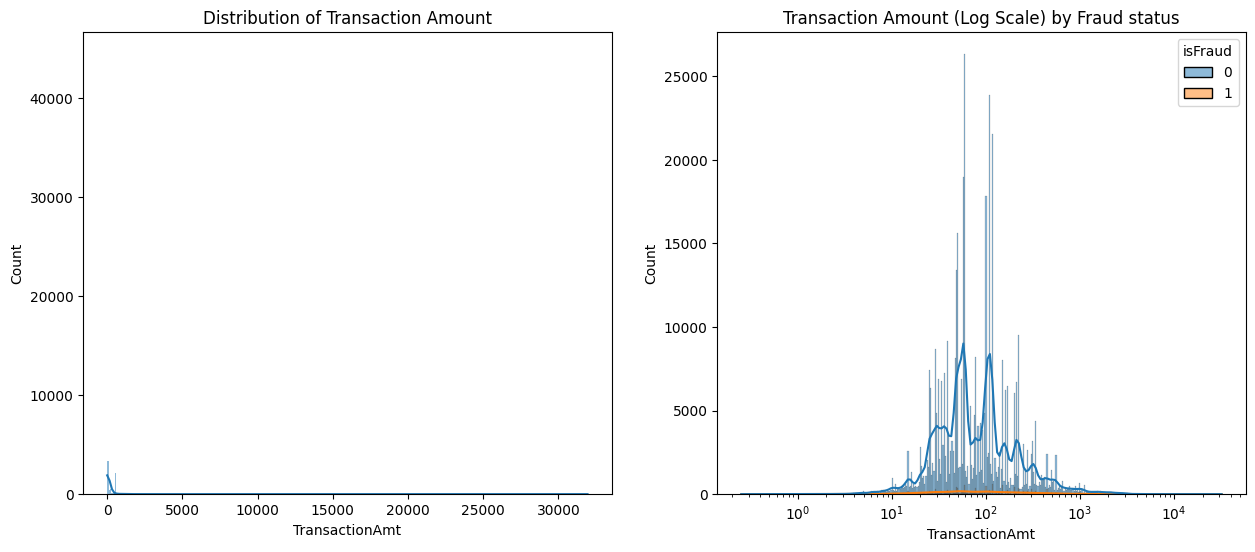

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution of Transaction Amount
sns.histplot(train['TransactionAmt'], ax=ax1, kde=True)
ax1.set_title('Distribution of Transaction Amount')

# Log Distribution of Transaction Amount by Fraud status
sns.histplot(data=train, x='TransactionAmt', hue='isFraud', log_scale=True, kde=True, ax=ax2)
ax2.set_title('Transaction Amount (Log Scale) by Fraud status')

plt.show()

## **Percentage of Fraudlent Transactions**

/tmp/ipython-input-3425992247.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCD', y='Fraud', data=tmp, palette='magma')


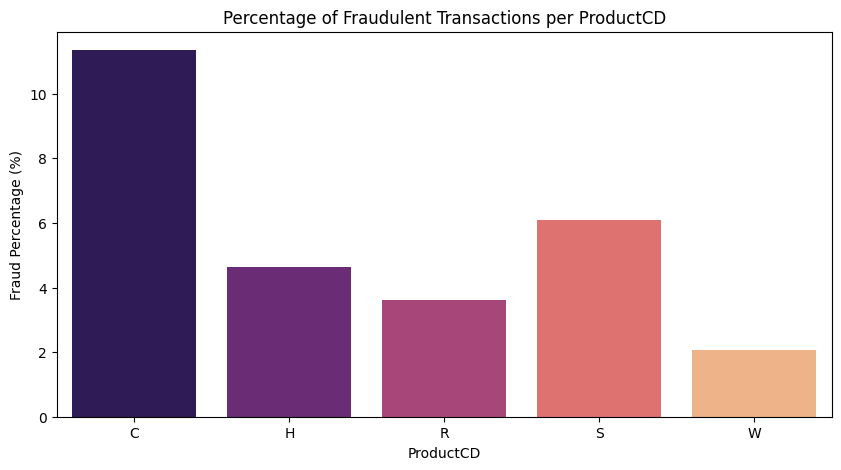

In [12]:
# Analyzing ProductCD vs Fraud
tmp = pd.crosstab(train['ProductCD'], train['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No Fraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='ProductCD', y='Fraud', data=tmp, palette='magma')
plt.title('Percentage of Fraudulent Transactions per ProductCD')
plt.ylabel('Fraud Percentage (%)')
plt.show()

## **Transaction over Time**

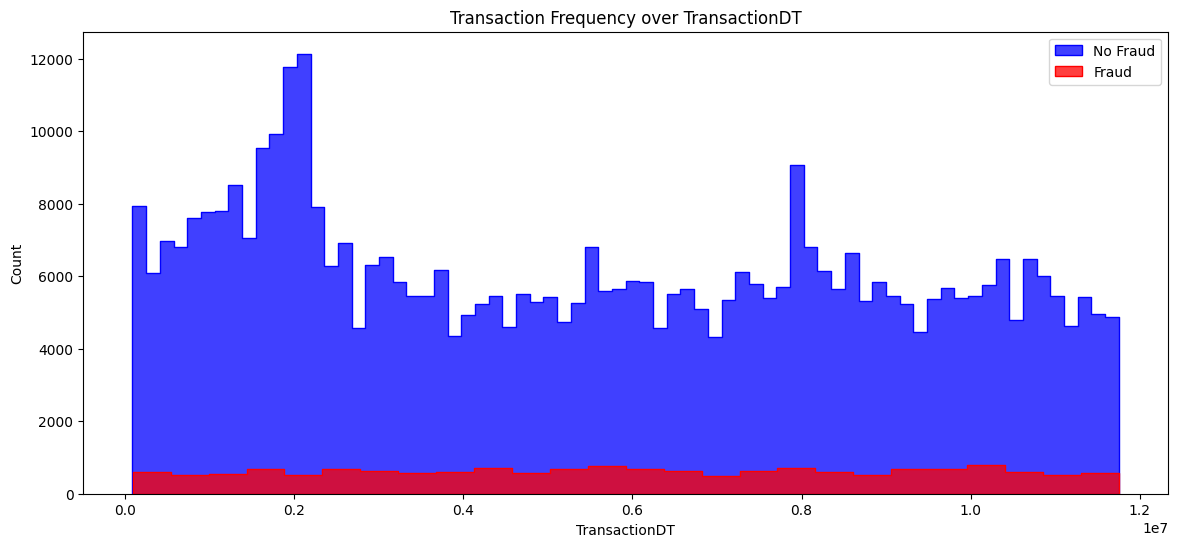

In [13]:
# Simple plot of transactions over the 'time' variable
plt.figure(figsize=(14, 6))
sns.histplot(train[train['isFraud']==0]['TransactionDT'], label='No Fraud', color='blue', element="step")
sns.histplot(train[train['isFraud']==1]['TransactionDT'], label='Fraud', color='red', element="step")
plt.legend()
plt.title('Transaction Frequency over TransactionDT')
plt.show()

# **Part 3: Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Redefine categorical columns based on what's actually in the reduced dataframe
current_categorical_cols = train_reduced.select_dtypes(include=['object']).columns.tolist()

# 2. Safely encode only the columns that exist
train_encoded = train_reduced.copy()
for col in current_categorical_cols:
    if col in train_encoded.columns:
        le = LabelEncoder()
        train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))

# 3. Define X and y by checking available columns
# We drop 'isFraud' and 'TransactionID', plus any other non-feature columns
cols_to_exclude = ['isFraud', 'TransactionID']
feature_cols = [c for c in train_encoded.columns if c not in cols_to_exclude]

X = train_encoded[feature_cols]
y = train_encoded['isFraud']

print(f"Data prepared. Total features: {len(feature_cols)}")
print(f"Target distribution: {y.value_counts(normalize=True)[1]:.2%} Fraud")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
import time
import numpy as np

# Using 3 folds for faster execution in Colab; 5 is standard for research
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def evaluate_model(model, name, X_data, y_data):
    auprc_scores = []
    print(f"--- Training {name} ---")
    start_time = time.time()

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_data, y_data)):
        X_train, X_val = X_data.iloc[train_idx], X_data.iloc[val_idx]
        y_train, y_val = y_data.iloc[train_idx], y_data.iloc[val_idx]

        # Fit model
        model.fit(X_train, y_train)

        # Predict probabilities for the Fraud class (1)
        preds = model.predict_proba(X_val)[:, 1]

        # Calculate AUPRC
        score = average_precision_score(y_val, preds)
        auprc_scores.append(score)
        print(f"Fold {fold+1} AUPRC: {score:.4f}")

    avg_score = np.mean(auprc_scores)
    runtime = time.time() - start_time
    print(f"Finished {name}. Avg AUPRC: {avg_score:.4f} | Time: {runtime:.2f}s\n")
    return avg_score, runtime

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 80/20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")

# **Part 4: Training & Evaluating Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import time
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Initialize models
models = {
    "XGBoost": XGBClassifier(n_estimators=300, scale_pos_weight=25, tree_method='hist', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=300, is_unbalance=True, device='cpu', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=300, auto_class_weights='Balanced', verbose=0, task_type="CPU", random_state=42)
}

performance_stats = []
predictions = {}
probabilities = {}

for name, model in models.items():
    # Measure Train Time
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    # Measure Test Time
    start_test = time.time()
    y_pred = model.predict(X_val)
    test_time = time.time() - start_test

    y_proba = model.predict_proba(X_val)[:, 1]

    # Store results
    predictions[name] = y_pred
    probabilities[name] = y_proba

    performance_stats.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1-Score": f1_score(y_val, y_pred),
        "AUC-ROC": roc_auc_score(y_val, y_proba),
        "Train Time (s)": train_time,
        "Test Time (s)": test_time
    })

# Display Performance Table
perf_df = pd.DataFrame(performance_stats)
print(perf_df.to_string(index=False))

## **Evaluating Models**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Confusion Matrix: {name}")

    print(f"\n--- Classification Report: {name} ---")
    print(classification_report(y_val, y_pred))

plt.tight_layout()
plt.show()

## **ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, y_proba in probabilities.items():
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()